In [ ]:
# 📥 1. Importer les packages
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 📂 2. Charger les données fusionnées
df_train_fused = pd.read_csv("/content/drive/MyDrive/archive/train_fusionne.csv")
df_test_fused = pd.read_csv("/content/drive/MyDrive/archive/test_fusionne.csv")

X_train_fused = df_train_fused.drop(columns=["label"])
y_train = df_train_fused["label"]

X_test_fused = df_test_fused.drop(columns=["label"])
y_test = df_test_fused["label"]

# 🔹 Charger le modèle existant (optionnel)
xgb_model = joblib.load("/content/drive/MyDrive/archive/mon_xgboost.pkl")


In [ ]:
# 🔥 3. Simulation de Federated Learning
n_clients = 5
rounds = 5

# Splitter X_train_fused et y_train pour chaque client
clients_data = []
X_client_splits = np.array_split(X_train_fused, n_clients)
y_client_splits = np.array_split(y_train, n_clients)

for i in range(n_clients):
    clients_data.append((X_client_splits[i], y_client_splits[i]))


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
# Fonction pour entraîner un modèle localement
def train_local_model(X_local, y_local):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_local, y_local)
    return model


In [ ]:
# 🔄 4. Boucle Federated Learning
models = []
for rnd in range(rounds):
    print(f"\n▶️ Round {rnd+1}/{rounds}")
    local_models = []
    for idx, (X_local, y_local) in enumerate(clients_data):
        print(f"\t- Client {idx+1}: Training local model")
        local_model = train_local_model(X_local, y_local)
        local_models.append(local_model)
    models = local_models



▶️ Round 1/5
	- Client 1: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 2: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 3: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 4: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 5: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:31:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



▶️ Round 2/5
	- Client 1: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 2: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 3: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 4: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 5: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



▶️ Round 3/5
	- Client 1: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:33:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 2: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 3: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:33:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 4: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:33:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 5: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



▶️ Round 4/5
	- Client 1: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 2: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 3: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 4: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:34:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 5: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



▶️ Round 5/5
	- Client 1: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 2: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 3: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 4: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:35:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


	- Client 5: Training local model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:36:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Agrégation simple : moyenne des prédictions
print("\n🔄 Agrégation des modèles...")
def predict_global(X):
    preds = np.zeros((X.shape[0], n_clients))
    for i, model in enumerate(models):
        preds[:, i] = model.predict_proba(X)[:,1]
    final_preds = np.mean(preds, axis=1)
    return final_preds



🔄 Agrégation des modèles...


In [ ]:
# 📊 5. Evaluation Globale
print("\n👋 Evaluation Finale sur Test Set")
y_pred_prob = predict_global(X_test_fused)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))



👋 Evaluation Finale sur Test Set
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    368549
           1       0.99      0.97      0.98    184274

    accuracy                           0.98    552823
   macro avg       0.98      0.98      0.98    552823
weighted avg       0.98      0.98      0.98    552823



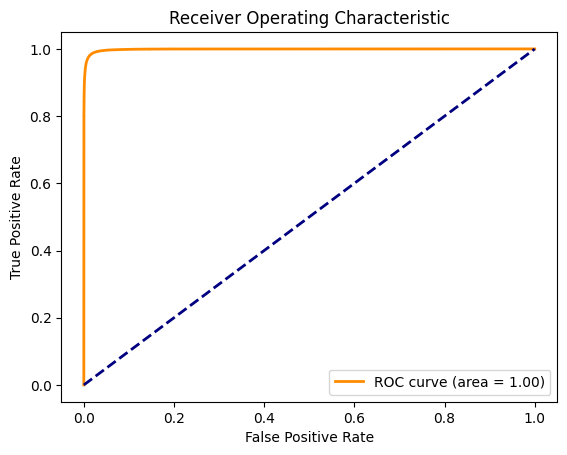

In [ ]:
# ROC Curve
def plot_roc(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

plot_roc(y_test, y_pred_prob)


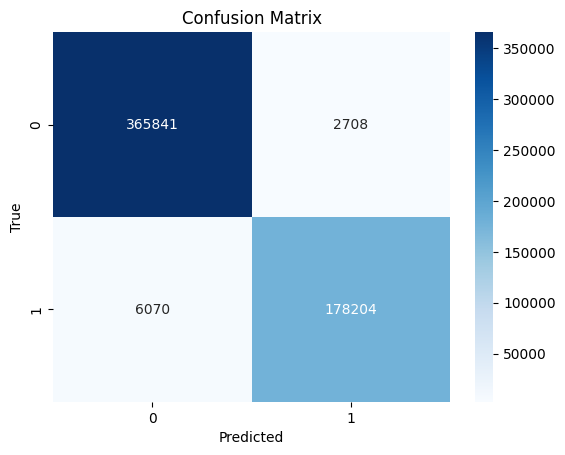

In [ ]:
# Confusion Matrix
def plot_conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_conf_matrix(y_test, y_pred)


In [ ]:
# 📈 6. Rapport HTML automatique
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_pred_prob)[:2])

html_report = f"""
<html>
<head><title>Federated Learning Report</title></head>
<body>
<h1>Federated Learning Evaluation Report</h1>
<ul>
<li><b>Accuracy:</b> {accuracy:.4f}</li>
<li><b>Precision:</b> {precision:.4f}</li>
<li><b>Recall:</b> {recall:.4f}</li>
<li><b>F1-Score:</b> {f1:.4f}</li>
<li><b>ROC AUC:</b> {roc_auc:.4f}</li>
</ul>
<h2>Conclusion</h2>
<p>Le modèle global construit via l'approche Federated Learning sur 5 clients atteint une AUC de {roc_auc:.2%}.
Les performances montrent que le modèle est capable de détecter efficacement les anomalies tout en respectant la confidentialité des données distribuées.</p>
</body>
</html>
"""

with open("federated_report.html", "w") as f:
    f.write(html_report)

print("\n💾 Rapport HTML généré avec succès: federated_report.html")



💾 Rapport HTML généré avec succès: federated_report.html


In [ ]:
# 📂 Sauvegarde des éléments pour le dashboard
import os
os.makedirs("/content/drive/MyDrive/archive/federated_assets", exist_ok=True)

# 1. Sauvegarde des modèles locaux (pour analyse comparative)
for i, model in enumerate(models):
    joblib.dump(model, f"/content/drive/MyDrive/archive/federated_assets/local_model_client_{i}.pkl")

# 2. Métriques globales
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "roc_auc": roc_auc
}
with open("/content/drive/MyDrive/archive/federated_assets/global_metrics.pkl", "wb") as f:
    pickle.dump(metrics, f)

# 3. Courbe ROC (image)
plt.figure()
plot_roc(y_test, y_pred_prob)
plt.savefig("/content/drive/MyDrive/archive/federated_assets/roc_curve_fl.png")
plt.close()

# 4. Matrice de confusion (image)
plt.figure()
plot_conf_matrix(y_test, y_pred)
plt.savefig("/content/drive/MyDrive/archive/federated_assets/confusion_matrix_fl.png")
plt.close()

# 5. Prédictions globales (pour comparaison dans le dashboard)
np.save("/content/drive/MyDrive/archive/federated_assets/y_pred_global.npy", y_pred)
np.save("/content/drive/MyDrive/archive/federated_assets/y_pred_prob_global.npy", y_pred_prob)

print("✅ Assets Federated Learning sauvegardés !")